**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [ ]:
# write your code here

## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $C = (1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

In [ ]:
# solution using sympy

**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

In [ ]:
# lambidfy function and insert a vector of w.


We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


In [ ]:
# Make an equation for government consumption

**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

In [ ]:
# Find solution and plot how utility varies depending on tau

A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{1-\sigma} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

In [ ]:
# write your code here

**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

In [ ]:
# write your code here  

## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

In [1]:
from scipy import optimize
from scipy import interpolate
import sympy as sm

import numpy as np
from types import SimpleNamespace

from copy import deepcopy
import time

from matplotlib.ticker import MaxNLocator

import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# Note: Numerically. We have to use a grid of l_t for kappa equal to 1 or 2 and see that profit is maximized for that l_t.
# solve using solver and graphical solution.

#Parameters
eta=0.5
w=1
kappa=1

kappa_vec = [1,2]

#Profit function
def calc_profit(l,kappa):
    p =  kappa*l**(-eta)
    profit =  p*l-w*l
    return profit 

for kappa in kappa_vec:
    l_guess=0.5
    obj = lambda l: -calc_profit(l[0],kappa)
    res = optimize.minimize(obj,l_guess,method='Nelder-Mead') 
    opt_l = res.x
    print(f'Numerical solution is {opt_l} for kappa={kappa}')
    l=(((1-eta)*kappa)/w)**(1/eta)
    print(f'Analytical solution is {[l]} for kappa={kappa}')
    print(f'Profit is {calc_profit(l,kappa)} for kappa={kappa}')

Numerical solution is [0.25] for kappa=1
Analytical solution is [0.25] for kappa=1
Profit is 0.25 for kappa=1
Numerical solution is [1.] for kappa=2
Analytical solution is [1.0] for kappa=2
Profit is 1.0 for kappa=2


We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

In [ ]:
# PLug delta ind og find samlet ex post nytte
def calc_opt_l(eta,kappa,w):
   return (((1-eta)*kappa)/w)**(1/eta)

def calc_profit_adj(l,kappa,iota):
    profit = np.where(l!=0, kappa*l**(-eta)*l -w*l-iota, 0)
    return profit 

def simulate(K=10000, Delta=0.05, follow_adjustment_rule=False):

    """ Takes as input the number of k values, the adjustment cost and whether to follow the adjustment rule or not.
    Returns the simulated values of kappa, labor supply, profit and discounted total value of profits. """

    np.random.seed(2000)
    #Simulate kappa values from starting point with K steps, do that 120 times.
    #a. allocate
    par = SimpleNamespace()
    par.K = K
    par.T = 120

    par.eta=0.5
    par.w=1
    par.rho=0.9
    par.sigma=0.1
    par.iota = 0.1
    par.R=(1+0.01)**(1/12)
    par.R_new=(1+0.10)
    par.Delta=Delta
    par.Delta_vec=np.ones(par.K)*par.Delta

    sim = SimpleNamespace()
    sim.kappa = np.zeros((par.T,par.K))
    sim.kappa_ini = np.ones(par.K)

    sim.l = np.zeros((par.T,par.K))
    sim.l_ini=np.zeros(par.K)

    sim.h = np.zeros((1,par.K))
    sim.profit=np.zeros((par.T,par.K))

    for t in range(par.T):
        #i. Lagged kappa values
        if t == 0:
            sim.kappa[t,:] = np.exp(par.rho* np.log10(sim.kappa_ini) + np.random.normal(-0.5*par.sigma*par.sigma,par.sigma,size=par.K))  
        else:
            sim.kappa[t,:] = np.exp(par.rho* np.log10(sim.kappa[t-1,:]) + np.random.normal(-0.5*par.sigma*par.sigma,par.sigma,size=par.K))

        # ii. labor supply
        sim.l[t,:] = calc_opt_l(par.eta,sim.kappa[t,:],par.w) 
        # iii profit
        sim.profit[t,:] = calc_profit_adj(sim.l[t,:],sim.kappa[t,:],par.iota) #adjustment cost

        if follow_adjustment_rule == True:
            if t == 0:
                sim.l[t,:]=np.where(np.abs(sim.l[t,:]-sim.l_ini) < par.Delta, sim.l_ini, sim.l[t,:])
                sim.profit[t,:] = np.where(np.abs(sim.l[t,:]-sim.l_ini) < par.Delta, 0, sim.profit[t,:])
            else: 
                sim.l[t,:]=np.where(np.abs(sim.l[t,:]-sim.l[t-1,:]) < par.Delta, sim.l[t-1,:], sim.l[t,:])
                sim.profit[t,:] = np.where(np.abs(sim.l[t,:]-sim.l[t-1,:]) < par.Delta, calc_profit_adj(sim.l[t,:],sim.kappa[t,:],0), sim.profit[t,:])
                
        # iii. profit
        #sim.profit[t,:] = calc_profit_adj(sim.l[t,:],sim.kappa[t,:],par.iota) #adjustment cost
        # iv. total value of profits
        sim.h += par.R**(-t) * (sim.profit[t,:])
    return np.mean(sim.h)

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

In [ ]:
K_vec = [1, 10, 100, 1000, 10000, 100000]
for i in K_vec:
    res=simulate(i,0.05,False)
    print(f'Ex-post value of profit for each kappa series is {res} for K={i}')

Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

In [ ]:
res=simulate(10000,0.05,False)
print(f'Discounted value of profits without adjustment rule {res} for K={10000}')
res=simulate(10000,0.05,True)
print(f'Discounted value of profits with adjustment rule {res} for K={10000}')

**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

In [ ]:
obj = lambda Delta: -simulate(10000, Delta, True)
bounds=[(0,2)]
opt = optimize.minimize(obj, 0.1, method='Nelder-Mead', bounds=bounds)
opt_Delta = opt.x[0]
print(opt_Delta)
print(simulate(10000, opt_Delta, True))

In [ ]:
K=10000
Delta=0.05

np.random.seed(2000)
#Simulate kappa values from starting point with K steps, do that 120 times.
#a. allocate
par = SimpleNamespace()
par.K = K
par.T = 8

par.eta=0.5
par.w=1
par.rho=0.9
par.sigma=0.1
par.iota = 0.1
par.R=(1+0.01)**(1/12)
par.R_new=(1+0.10)

par.m_min = 0
par.m_max = 2
par.Nm = 100
eta=0.5
w=1

sim = SimpleNamespace()
sim.kappa = np.zeros((par.T,par.K))
sim.kappa_ini = np.ones(par.K)

sim.l = np.zeros((par.T,par.K))
sim.l_ini=np.zeros(par.K)

sim.h = np.zeros((1,par.K))
sim.profit=np.zeros((par.T,par.K))

def calc_profit_adj(l,kappa,iota):
    profit = np.where(l!=0, kappa*l**(-eta)*l -w*l-iota, 0)
    return profit 

def calc_opt_l(eta,kappa,w):
   return (((1-eta)*kappa)/w)**(1/eta)

def solve_last_period(par):

    # a. allocate
    k_grid = np.linspace(par.m_min,par.m_max,par.Nm)
    v_func = np.empty(par.Nm)
    l_func = np.empty(par.Nm)

    # b. solve for each value of the grid, meaning that for each value of cash in hand, we find the optimal consumption and value of the value function.
    #Normally that would just be done once for each problem, but we want to use it to create an interpolater.
    for i,k in enumerate(k_grid):

        # i. objective
        obj = lambda l: -calc_profit_adj(l[0],k,par.iota)

        # ii. optimizer
        x0 = 0.2 # initial value
        result = optimize.minimize(obj,[x0],method='L-BFGS-B',bounds=[(par.m_min,par.m_max)])

        # iii. save
        v_func[i] = -result.fun
        l_func[i] = result.x
        
    return k_grid,v_func,l_func

k2_grid,v2_func,l2_func = solve_last_period(par)

#IMPORTANT: We construct an interpolater called v2_func_interp using the interpolater function from scipy.interpolate.
#The interpolater takes as arguments the grid and the values of the function on the grid which we found before.
v2_func_interp = interpolate.RegularGridInterpolator([k2_grid],v2_func,
    bounds_error=False,fill_value=None)

#NB: kappa_grid is a grid of kappas that represent the distribution of expected values
kappa_grid = np.linspace(par.m_min,par.m_max,par.Nm)

#Note that the v_plus_interp is not a specific interpolater, but a placeholder for the one we create later called v2_func_interp
def v(l,k,iota,v_plus_interp):
    
    # a. expected value
    v_plus = 0.0
    for kappa in kappa_grid:
            
        # i. next period value function evaluated using interpolation, depends on the cash on hand, which depends on income shock
        v_plus_now = v_plus_interp([kappa])[0]
        
        # ii. the next period value is added to the expected value
        v_plus += v_plus_now
    #iii. average value is found
    v_plus/=par.Nm #average value
    # b. total value in current period is found
    return calc_profit_adj(l,kappa,par.iota) + par.R*v_plus


#v_plus_interp is still not a specific interpolatar, but a placeholder for the one we create later called v_plus_func_interp
#Note that the interpolater is callable, meaning that we can call it with a value of m and it will return the interpolated function value at that point.
def solve_single_period(par,v_plus_interp):

    # a. allocate
    k_grid = np.linspace(par.m_min,par.m_max,par.Nm)
    v_func = np.empty(par.Nm)
    l_func = np.empty(par.Nm)
    
    # b. solve
    for i,k in enumerate(k_grid):
        
        # i. objective
        obj = lambda l: -v(l[0],k,par.iota,v_plus_interp)
        
        # ii. solve
        x0 = k/2 # initial guess
        result = optimize.minimize(obj,[x0],method='L-BFGS-B',bounds=[(par.m_min,par.m_max)])
        
        # iv. save
        v_func[i] = -result.fun
        l_func[i] = result.x[0]
     
    return k_grid,v_func,l_func

def solve_many_periods(par):
    
    t0 = time.time()
    
    # a. allocate
    sol = SimpleNamespace()
    sol.k = np.zeros((par.T,par.Nm))
    sol.v = np.zeros((par.T,par.Nm))
    sol.l = np.zeros((par.T,par.Nm))
    
    # b. iterate
    for t in reversed(range(par.T)):
        
        t0_ = time.time()
        
        if t == par.T-1:
            
            sol.k[t,:],sol.v[t,:],sol.l[t,:] = solve_last_period(par)
            
        else:
    
            # i. construct interpolator
            #Note: The interpolater is updated in each period, based on the optimal cash on hand and value function in the next period (the one which was just solved).
            v_plus_interp = interpolate.RegularGridInterpolator([sol.k[t+1,:]],sol.v[t+1,:],
                bounds_error=False,fill_value=None)
    
            # ii. solve period
            sol.k[t,:],sol.v[t,:],sol.l[t,:] = solve_single_period(par,v_plus_interp)
        
        print(f'period {t} solved in {time.time()-t0_:5.1f} secs')
        
    print(f'model solved in {time.time()-t0:5.1f} secs')
    
    return sol

par.T = 8
sol = solve_many_periods(par)


In [ ]:
l_interps = []
for t in range(par.T):
    #This interpolater is a consumption interpolator, which builds on the solutions from above
    l_interp = interpolate.RegularGridInterpolator([sol.k[t,:]],sol.l[t,:],
        bounds_error=False,fill_value=None)
    l_interps.append(l_interp)


**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

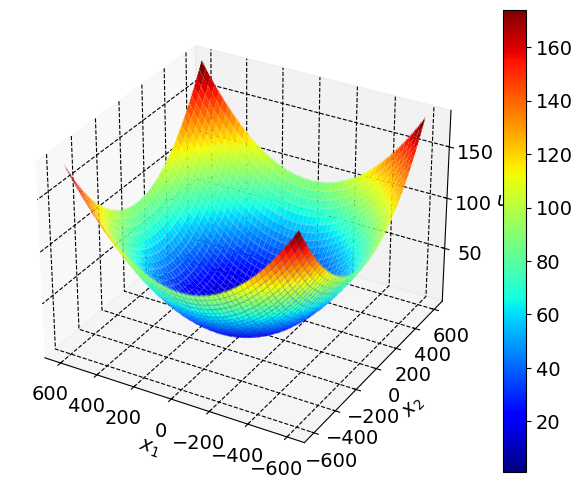

In [2]:
def griewank(x):
    return _griewank(x[0], x[1])

def _griewank(x1, x2):
    A = x1 ** 2 / 4000 + x2 ** 2 / 4000
    B = np.cos(x1 / np.sqrt(1)) * np.cos(x2 / np.sqrt(2))
    return A - B + 1

N = 5000  # numbers in grid
lower_bound = -600  # lower bound
upper_bound = 600  # upper bound


# a. grids
x1_vec = np.linspace(lower_bound, upper_bound, N)
x2_vec = np.linspace(lower_bound, upper_bound, N)
x1_grid, x2_grid = np.meshgrid(x1_vec, x2_vec, indexing='ij')
griewank_grid = _griewank(x1_grid, x2_grid)

# b. main
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1, projection='3d')
cs = ax.plot_surface(x1_grid, x2_grid, griewank_grid, cmap=cm.jet)

# c. add labels
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$u$')

# d. invert xaxis
ax.invert_xaxis()

# e. add colorbar
fig.colorbar(cs);

In [3]:
def collect(x):
    # globals used to keep track across iterations
    global nit  # set nit = 0 before calling optimizer
    global x1s
    global x2s
    global fs

    # a. initialize list
    if nit == 0:
        x1s = [x[0]]
        x2s = [x[1]]
        fs = [griewank(x)]

    # b. append trial values
    x1s.append(x[0])
    x2s.append(x[1])
    fs.append(griewank(x))

    # c. increment number of evaluations
    nit += 1

def contour():
    global nit
    global x1s
    global x2s

    # a. contour plot
    fig = plt.figure(figsize=(10, 4))
    ax = fig.add_subplot(1, 2, 1)
    levels = [1e-6, 5 * 1e-6, 1e-5, 5 * 1e-5, 1e-4, 5 * 1e-4, 1e-3, 5 * 1e-3, 1e-2, 5 * 1e-2, 1, 2, 4, 6, 8, 12, 16, 20]
    cs = ax.contour(x1_grid, x2_grid, griewank_grid, levels=levels, cmap=cm.jet)
    fig.colorbar(cs)
    ax.plot(x1s, x2s, '-o', ms=4, color='black')
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')

    fig.tight_layout()


def convergence(K,x0s):
    global nit
    k_grid = np.arange(K)
    x0s = np.array(x0s)

    # Create the first subplot for x0s[:,0]
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

    # Plot x0s[:,0]
    ax[0].plot(k_grid, x0s[:, 0], '-o', ms=1, color='black')
    ax[0].set_xlabel('k-value')
    ax[0].set_ylabel('x0s[:,0]')

    # Create the second subplot for x0s[:,1]
    ax[1].plot(k_grid, x0s[:, 1], '-o', ms=1, color='black')
    ax[1].set_xlabel('k-value')
    ax[1].set_ylabel('x0s[:,1]')

    # Adjust spacing between subplots
    fig.tight_layout()

    # Display the plot
    plt.show()    

In [4]:
def solve_multistart(K=1000, K_warm=10, tol=1e-8,lower_bound=-600, upper_bound=600,refined=True,print_contour=False,print_convergence=False):
    np.random.seed(2000)
    x0s = np.empty((K, 2))
    xs = np.empty((K, 2))

    fopt = np.inf
    xopt = np.nan
    for k in range(K):
        # Draw random starting point
        x0s[k, :] = np.random.uniform(lower_bound, upper_bound, 2)
        if k >= K_warm and refined:
            chi = 0.5 * 2 / (1 + np.exp((k - K_warm) / 100))
            x0s[k, :] = chi * x0s[k, :] + (1 - chi) * xopt

        # a. optimize
        result = optimize.minimize(griewank, x0s[k, :], method='BFGS', callback=collect, tol=tol, options={'disp': False})
        xs[k, :] = result.x
        f = result.fun

        # b. update
        if f < fopt:
            fopt = f
            xopt = xs[k, :]

        if fopt < tol:
            break

    print(xopt, fopt, nit)
    if print_contour:
        contour()
    if print_convergence:
        convergence(K,x0s=x0s)
    return result,x0s

[-12.56009041   8.87688873] 0.05917817705510919 9655


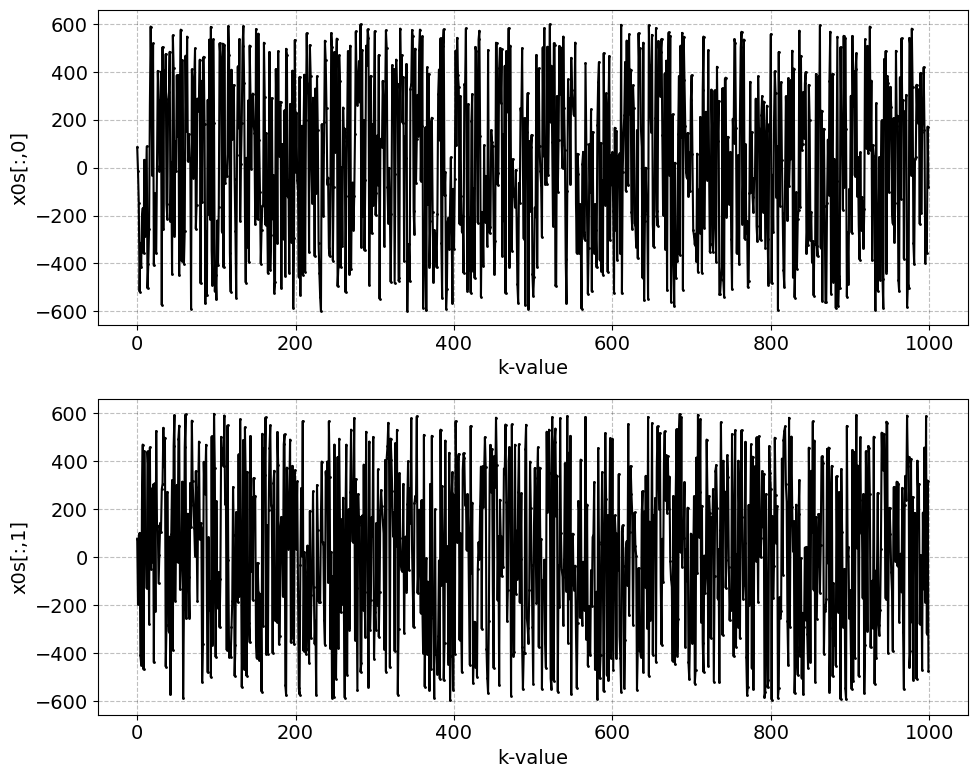

[-7.50683665e-09 -3.91694699e-09] 0.0 3263


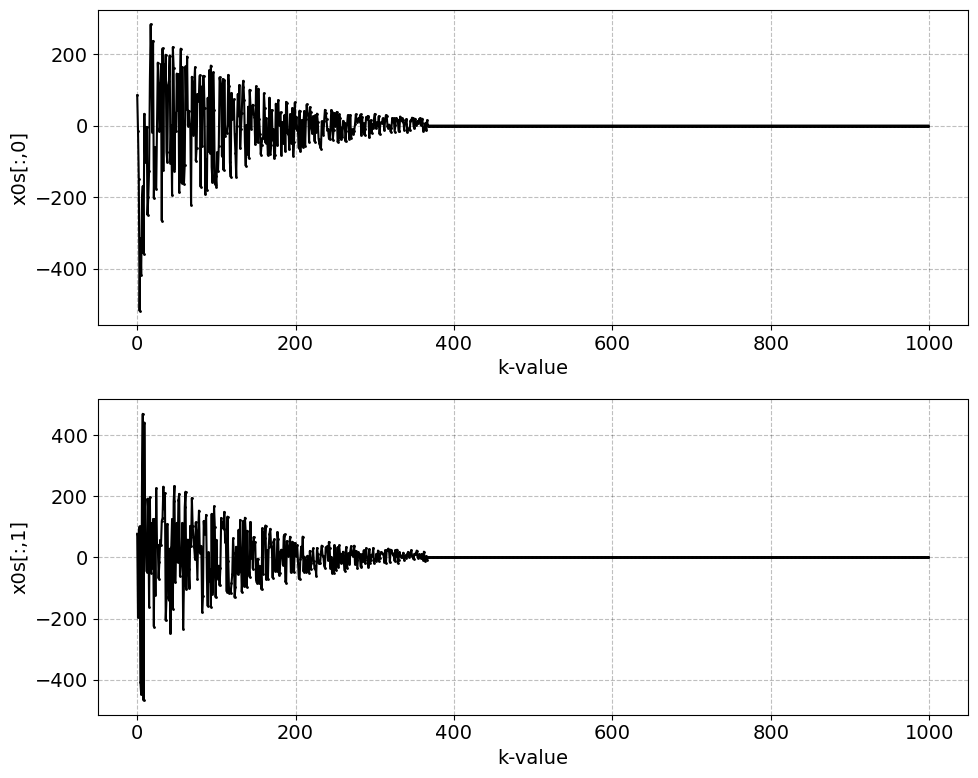

In [5]:
nit=0
res=solve_multistart(refined=False, print_convergence=True)
nit=0
res=solve_multistart(refined=True, print_convergence=True)

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

In [6]:
nit=0
t0 = time.time()
res=solve_multistart(K_warm=10)
print(f'model solved in {time.time()-t0:5.1f} secs')
nit=0
t0 = time.time()
res=solve_multistart(K_warm=100)
print(f'model solved in {time.time()-t0:5.1f} secs')

[-7.50683665e-09 -3.91694699e-09] 0.0 3263
model solved in   1.8 secs
[-3.97123331e-09 -8.42323954e-09] 0.0 3819
model solved in   2.4 secs


[-3.97123331e-09 -8.42323954e-09] 0.0 3819


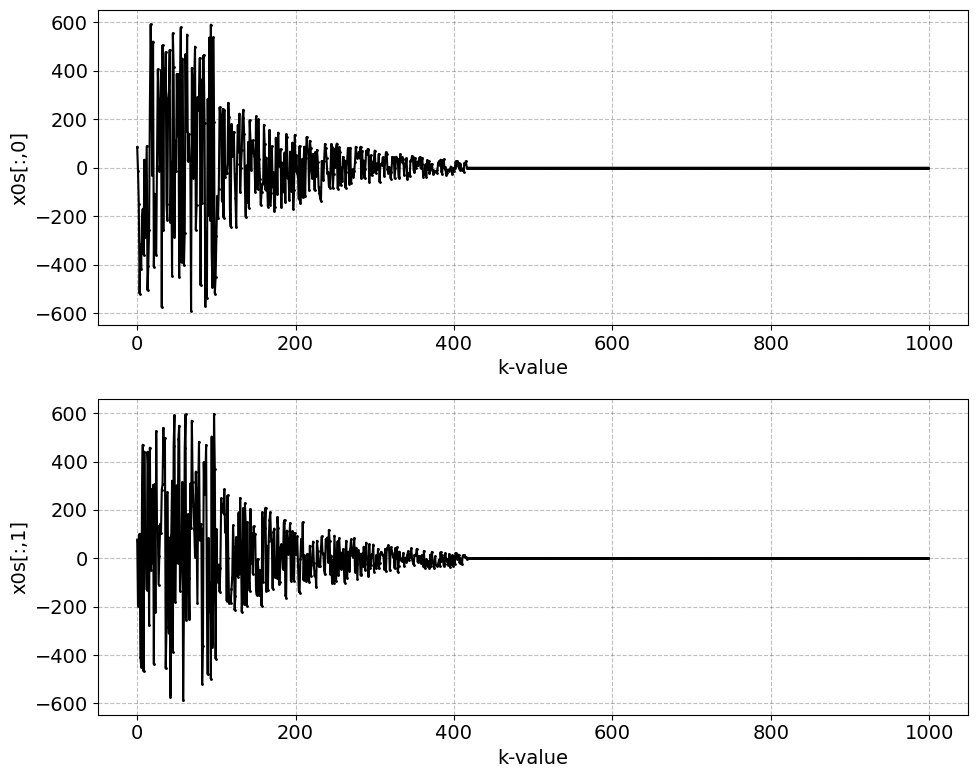

In [7]:
nit=0
res=solve_multistart(K_warm=100, print_convergence=True)